###  `Use the iris database to answer the following quesitons:`

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import pydataset

In [2]:
# Datasets
iris = sns.load_dataset('iris') 
swiss = pydataset.data('swiss')
insect_sprays = pydataset.data('InsectSprays')
sleep_study = pydataset.data('sleepstudy')

In [6]:
#warnings
import warnings
warnings.filterwarnings('ignore')

In [7]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### ` 1. What does the distribution of petal lengths look like?`

<AxesSubplot:xlabel='petal_length', ylabel='Density'>

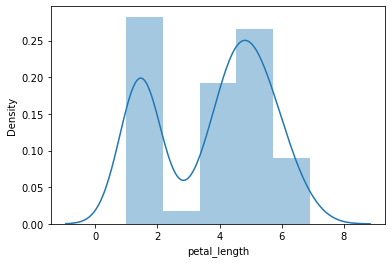

In [8]:
sns.distplot(iris.petal_length)

#### `2. Is there a correlation between petal length and petal width?`

In [9]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Text(1.25, 1.5, 'pc = 0.96287')

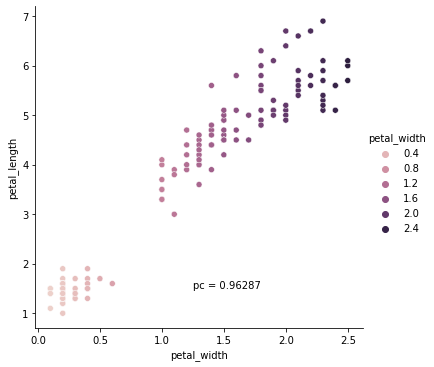

In [18]:
#relplot petal width and length
#pc = petal correlation
#plt.text to add pc on chart


sns.relplot(x ="petal_width", y= "petal_length", hue= 'petal_width', data= iris)
pc= iris.corr().loc['petal_length', 'petal_width']
plt.text(1.25, 1.5, f'pc = {pc:.5}')

#### ` 3. Would it be reasonable to predict species based on sepal width and sepal length?`

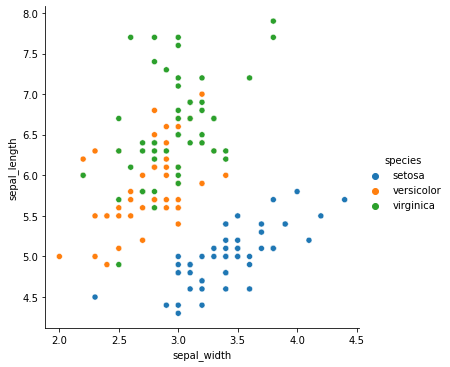

In [22]:
#hue species
sns.relplot(data=iris, x='sepal_width', y='sepal_length', hue='species')

#### ` 4. Which features would be best used to predict species?`

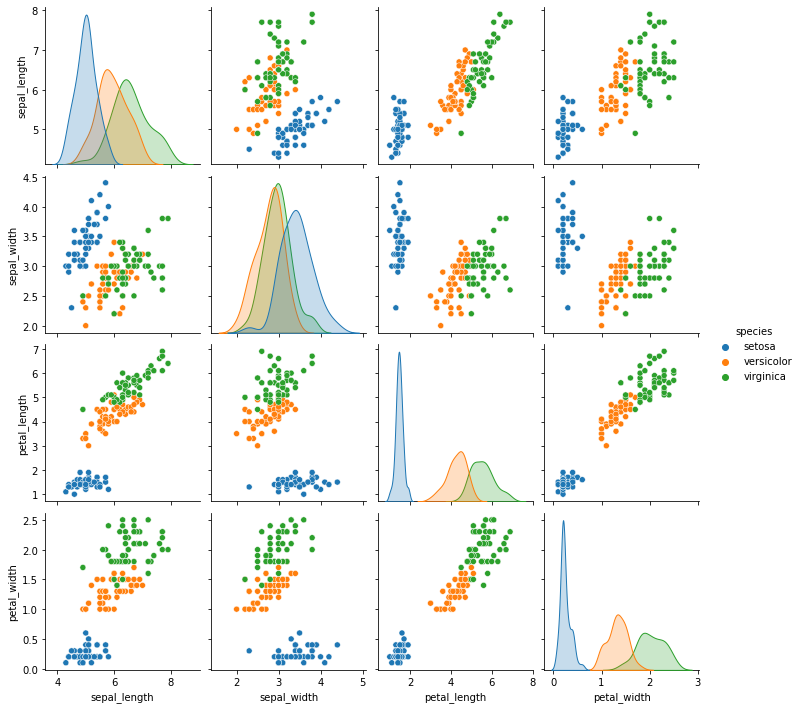

In [24]:
#pairplot- to visualize every quantative feature
sns.pairplot(iris, hue='species')

#### ` 1.  Use seaborn's load_dataset function to load the anscombe data set.`
#####                          `Use pandas to group the data by the dataset column`
#####                         `Calculate summary statistics for each dataset. What do you notice?`

In [25]:
anscombe = sns.load_dataset("anscombe")

In [26]:
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [27]:
anscombe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [28]:
anscombe.describe()

,x,y
count,44.000000,44.000000
mean,9.000000,7.500682
std,3.198837,1.958925
min,4.000000,3.100000
25%,7.000000,6.117500
50%,8.000000,7.520000
75%,11.000000,8.747500
max,19.000000,12.740000


In [29]:
#Uses pandas to group by dataset column
anscombe.groupby("dataset").describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

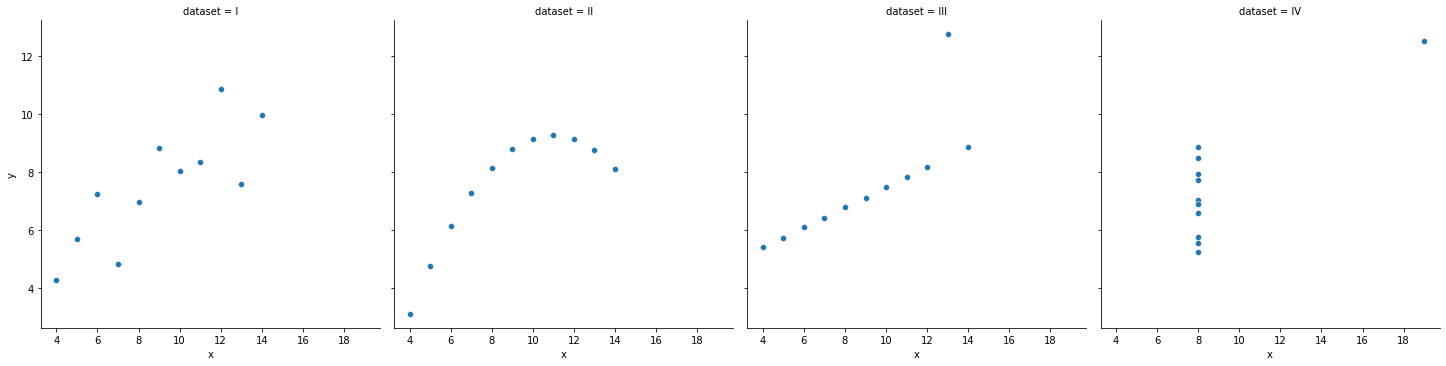

In [30]:
#Plot the x and y values from the anscombe data. Each dataset should be in a separate column.
sns.relplot(x="x", y="y", col="dataset", data=anscombe)

#### `2. Load the InsectSprays dataset and read it's documentation. `
####  `Create a boxplot that shows the effectiveness of the different insect sprays.`

In [31]:
pydataset.data('InsectSprays', show_doc=True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

In [32]:
insect_sprays = pydataset.data('InsectSprays')
insect_sprays.head()

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


In [33]:
insect_sprays.describe()

,count
count,72.000000
mean,9.500000
std,7.203286
min,0.000000
25%,3.000000
50%,7.000000
75%,14.250000
max,26.000000


In [34]:
insect_sprays.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 1 to 72
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   count   72 non-null     int64 
 1   spray   72 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


<AxesSubplot:title={'center':'Insect Spray Effectiveness'}, xlabel='spray', ylabel='count'>

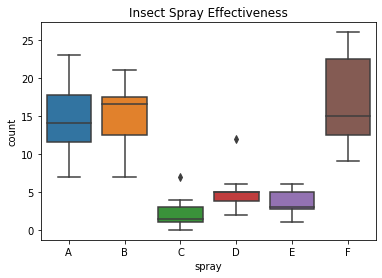

In [35]:

# Create a boxplot that shows the effectiveness of the different insect sprays.
plt.title("Insect Spray Effectiveness")
sns.boxplot(data=insect_sprays, y='count', x='spray')

#### `3. Load the swiss dataset and read it's documentation. `
####  `Create visualizations to answer the following questions: `



In [36]:
pydataset.data('swiss', show_doc=True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [37]:
swiss = pydataset.data('swiss')
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [38]:
swiss.describe()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
count,47.000000,47.000000,47.000000,47.000000,47.00000,47.000000
mean,70.142553,50.659574,16.489362,10.978723,41.14383,19.942553
std,12.491697,22.711218,7.977883,9.615407,41.70485,2.912697
min,35.000000,1.200000,3.000000,1.000000,2.15000,10.800000
25%,64.700000,35.900000,12.000000,6.000000,5.19500,18.150000
50%,70.400000,54.100000,16.000000,8.000000,15.14000,20.000000
75%,78.450000,67.650000,22.000000,12.000000,93.12500,21.700000
max,92.500000,89.700000,37.000000,53.000000,100.00000,26.600000


#### `Create an attribute is_catholic that holds a `
#### `boolean value of whether  not the province is Catholic. `

In [39]:

swiss["is_catholic"] = swiss.Catholic.apply(lambda x: "Catholic" if x >= 70 else "Not Catholic")

##### `Does whether or not a province is Catholic influence fertility?`

<AxesSubplot:title={'center':'Catholic influence on fertility'}, xlabel='is_catholic', ylabel='Fertility'>

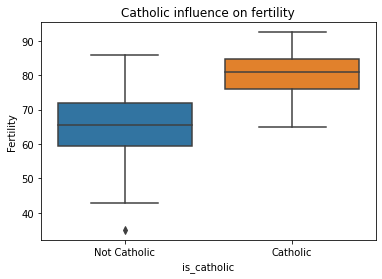

In [43]:
#boxplot to show relation of Catholic x Fertility
plt.title("Catholic influence on fertility")
sns.boxplot(data=swiss, y="Fertility", x="is_catholic")

##### `What measure correlates most strongly with fertility?`

In [46]:
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,Not Catholic
Delemont,83.1,45.1,6,9,84.84,22.2,Catholic
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,Catholic
Moutier,85.8,36.5,12,7,33.77,20.3,Not Catholic
Neuveville,76.9,43.5,17,15,5.16,20.6,Not Catholic


Fertility           1.000000
Agriculture         0.353079
Examination        -0.645883
Education          -0.663789
Catholic            0.463685
Infant.Mortality    0.416556
Name: Fertility, dtype: float64


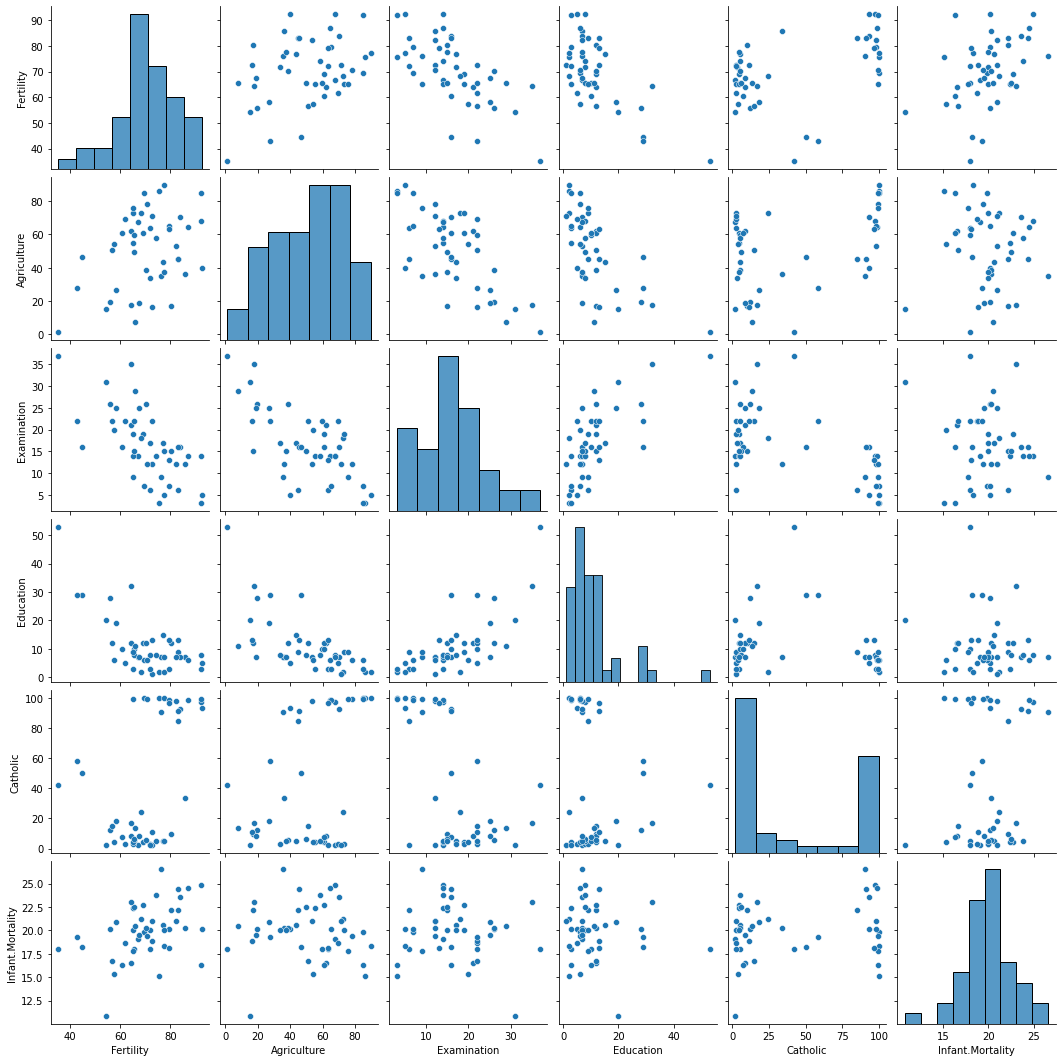

In [49]:
print(swiss.corr().Fertility)
sns.pairplot(swiss)

####  `4. Using the chipotle dataset , create a bar chart that shows the 4 most popular items and the revenue produced by each.`



In [50]:
def get_db_url(db):
    from env import user, password, host
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [88]:
url = get_db_url('chipotle')
query = "SELECT * FROM orders"
orders = pd.read_sql(query, url)
orders.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [89]:
orders.describe()

,id,order_id,quantity
count,4622.000000,4622.000000,4622.000000
mean,2311.500000,927.254868,1.075725
std,1334.400802,528.890796,0.410186
min,1.000000,1.000000,1.000000
25%,1156.250000,477.250000,1.000000
50%,2311.500000,926.000000,1.000000
75%,3466.750000,1393.000000,1.000000
max,4622.000000,1834.000000,15.000000


In [90]:
#create a bar chart that shows the 4 most popular items 
#and the revenue produced by each.
#1. Convert price to float 
orders.item_price = orders.item_price.str.replace('$', '').astype('float')

In [91]:
orders.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,2.39
1,2,1,1,Izze,[Clementine],3.39
2,3,1,1,Nantucket Nectar,[Apple],3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98


In [92]:
#find revenues

order_revenue = orders[["item_name", "item_price"]]
order_revenue.head()

,item_name,item_price
0,Chips and Fresh Tomato Salsa,2.39
1,Izze,3.39
2,Nantucket Nectar,3.39
3,Chips and Tomatillo-Green Chili Salsa,2.39
4,Chicken Bowl,16.98


In [93]:
order_revenue = order_revenue.groupby("item_name").sum()
order_revenue.head()

,item_price
item_name,
6 Pack Soft Drink,356.95
Barbacoa Bowl,672.36
Barbacoa Burrito,894.75
Barbacoa Crispy Tacos,120.21
Barbacoa Salad Bowl,106.40


In [87]:
chipotle_order_revenue.rename(columns={'item_price': 'revenue'}, inplace=True)
chipotle_order_revenue.head(4)

,Item Revenue
item_name,
6 Pack Soft Drink,356.95
Barbacoa Bowl,672.36
Barbacoa Burrito,894.75
Barbacoa Crispy Tacos,120.21


In [94]:
#rename item_name
order_revenue.rename(columns={'item_price': 'revenue'}, inplace=True)
order_revenue.head()

,revenue
item_name,
6 Pack Soft Drink,356.95
Barbacoa Bowl,672.36
Barbacoa Burrito,894.75
Barbacoa Crispy Tacos,120.21
Barbacoa Salad Bowl,106.40


In [95]:
#find top 4 items
top_4 = order_revenue.revenue.sort_values(ascending=False).head(4)
top_4

item_name
Chicken Bowl       7342.73
Chicken Burrito    5575.82
Steak Burrito      3851.43
Steak Bowl         2260.19
Name: revenue, dtype: float64

In [96]:
#reset the index 
top_4 = pd.DataFrame(top_4).reset_index()
top_4

,item_name,revenue
0,Chicken Bowl,7342.73
1,Chicken Burrito,5575.82
2,Steak Burrito,3851.43
3,Steak Bowl,2260.19


<AxesSubplot:xlabel='revenue', ylabel='item_name'>

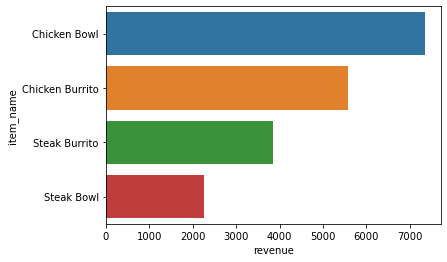

In [97]:
#barchart
sns.barplot(data=top_4, y='item_name', x='revenue')

#### ` 5. Load the sleepstudy data and read it's documentation. `
##### ` And a more prominant line showing the average change in reaction time.`

In [98]:
pydataset.data("sleep", show_doc=True)


sleep

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Student's Sleep Data

### Description

Data which show the effect of two soporific drugs (increase in hours of sleep
compared to control) on 10 patients.

### Usage

    sleep

### Format

A data frame with 20 observations on 3 variables.

[, 1]

extra

numeric

increase in hours of sleep

[, 2]

group

factor

drug given

[, 3]

ID

factor

patient ID

### Details

The `group` variable name may be misleading about the data: They represent
measurements on 10 persons, not in groups.

### Source

Cushny, A. R. and Peebles, A. R. (1905) The action of optical isomers: II
hyoscines. _The Journal of Physiology_ **32**, 501–510.

Student (1908) The probable error of the mean. _Biometrika_, **6**, 20.

### References

Scheffé, Henry (1959) _The Analysis of Variance_. New York, NY: Wiley.

### Examples

    require(stats)
    ## Student's paired t-test
    with(sleep,
         t.test(extra[group =

In [99]:
sleep = pydataset.data("sleepstudy")
sleep

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372


##### ` Use seaborn to create a line chart of all the individual subject's reaction times `

In [101]:
sleep.Subject = 'subject ' + sleep.Subject.astype(str)
sleep.head()

,Reaction,Days,Subject
1,249.5600,0,subject 308
2,258.7047,1,subject 308
3,250.8006,2,subject 308
4,321.4398,3,subject 308
5,356.8519,4,subject 308


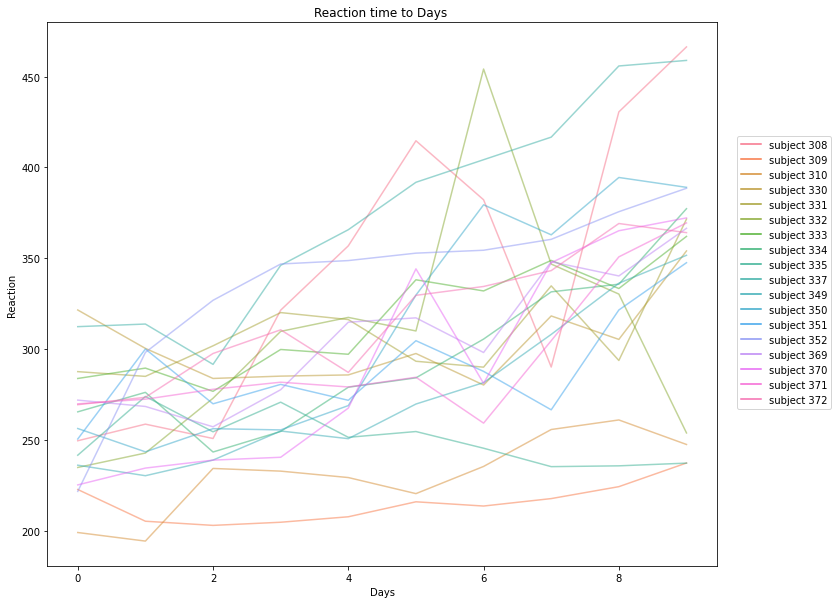

In [111]:
#line chart
plt.figure(figsize=(12, 10))
plt.title("Reaction time to Days ")
sns.lineplot(data=sleep, y='Reaction', x='Days', hue='Subject', alpha=.5)
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 0.8))

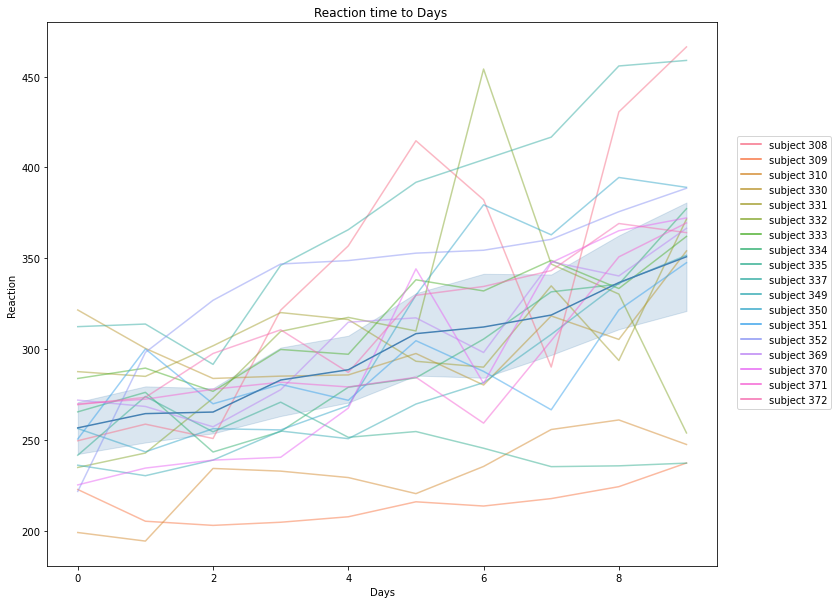

In [113]:
#more prominant line showing the average change in reaction time.
plt.figure(figsize=(12, 10))
plt.title("Reaction time to Days ")
sns.lineplot(data=sleep, y='Reaction', x='Days', hue='Subject', alpha=.5)
sns.lineplot(data=sleep, y='Reaction', x='Days', color='steelblue')
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 0.8))
